# Day 32 Assignment

__Question 1:__

Using the IRIS dataset do the NaiveBayes Modelling.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data)
data.head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
data.columns = iris.feature_names
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [9]:
data.shape

(150, 4)

In [10]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
data.describe().T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

In [13]:
data.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

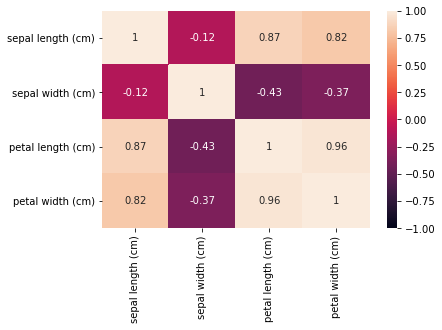

In [14]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B450D706D0>,
      dtype=object)

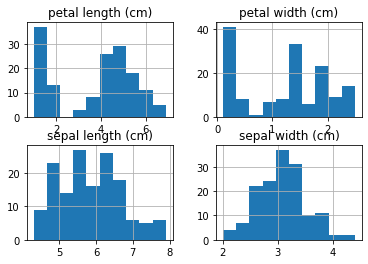

In [15]:
data.hist()

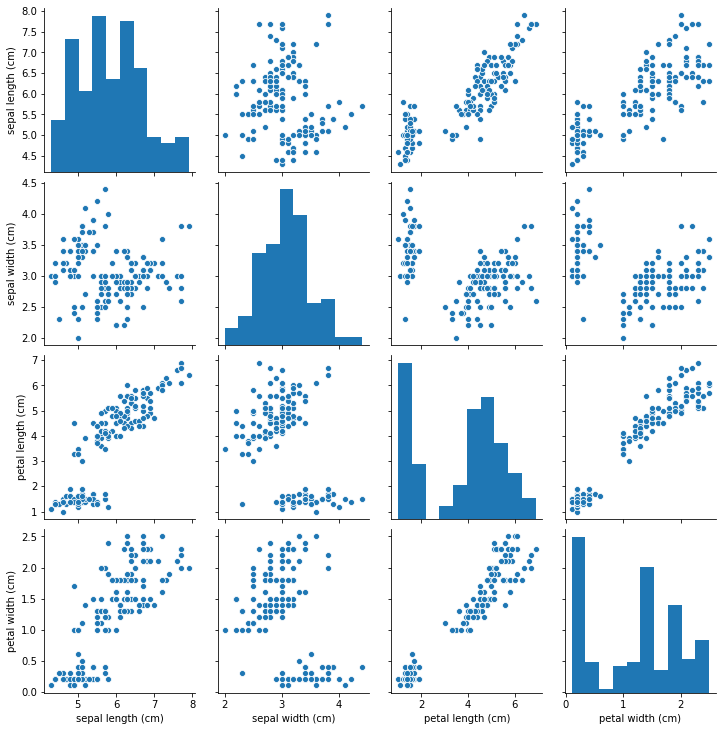

In [17]:
sns.pairplot(data)

In [29]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 3)

In [30]:
#training the data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [31]:
#predicting from x_test

y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [32]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [34]:
#precision_score
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average='weighted')
print('Precision_score of test set =',precision)

Precision_score of test set = 0.975877192982456


In [35]:
#recall_score
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred,average='weighted')
print('recall_score of test set =',recall)

recall_score of test set = 0.9736842105263158


In [36]:
#f1_score
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='weighted')
print('f1_score of test set =',f1)

f1_score of test set = 0.9736842105263158


In [37]:
#comparing accuraacy of GaussianNB and MultinomialNB types of NaiveBayes
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


gnb= GaussianNB()
mnb= MultinomialNB()
#GaussianNB
cross_val_score(gnb,iris.data,iris.target,scoring='accuracy',cv=10).mean()

0.9533333333333334

In [40]:
#MultonomialNB
cross_val_score(mnb,iris.data,iris.target,scoring='accuracy',cv=10).mean()

0.9533333333333334

Looks like they are similar